## MAX CUT SDP relaxation
### Graph based on viewers rating movies
Here we solve the relaxed SDP to find the MAX cut in a graph. The goal is to find integral solution for $\gamma$-stable graphs

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import pylab

from algo import build_laplacian, solve_sdp, assignment_solution_sdp
from data_proc import build_a, build_graph, build_user_to_movies

## Fake data to illustrate the integral solution
Easy max cut solution. 

In [2]:
W = np.array([[0,4,0,8],[4,0,0,2],[0,0,0,7],[8,2,7,0]])
L = build_laplacian(W)
X = solve_sdp(L, triangle_inequalities=True)

{'obj': 76.00000011979628, 'cvxopt_sol': {'dual slack': 1.3267550541781866e-09, 'primal slack': 2.4034875355250986e-09, 'dual objective': -76.00000052607633, 'gap': 1.0930142936199193e-06, 'z': <272x1 matrix, tc='d'>, 'status': 'optimal', 's': <272x1 matrix, tc='d'>, 'primal objective': -75.99999971351623, 'relative gap': 1.4381767075527133e-08, 'dual infeasibility': 2.277358076017723e-10, 'y': <4x1 matrix, tc='d'>, 'primal infeasibility': 2.422191871671932e-09, 'iterations': 6, 'residual as primal infeasibility certificate': None, 'x': <10x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None}, 'time': 0.045472145080566406, 'status': 'optimal'}


In [3]:
# assignment
X_array=np.array(X)
assignment_X = assignment_solution_sdp(X_array)

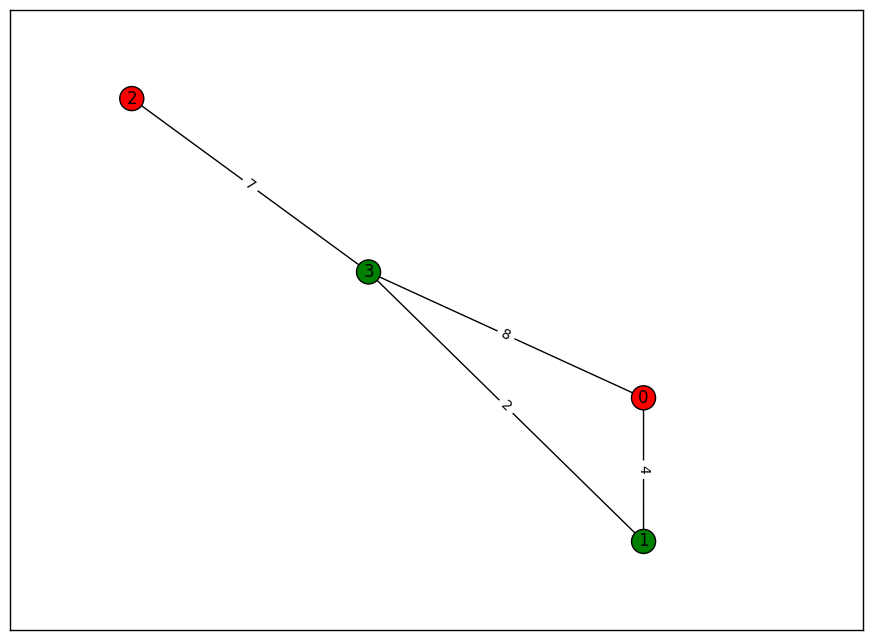

In [5]:
#display the graph
G = nx.from_numpy_matrix(W)
fig=pylab.figure(figsize=(11,8))

colors = ['g', 'r']

node_colors=['w']*W.shape[0]
for node, cluster in enumerate(assignment_X):
    node_colors[node] = colors[int(cluster)]

pos=nx.spring_layout(G)
#edges
nx.draw_networkx(G,pos,
                edgelist=[e for e in G.edges()],
                node_color=node_colors)


labels={e:'{0}'.format(W[e]) for e in G.edges()}
#flow label
nx.draw_networkx_edge_labels(G, pos,
                        edge_labels=labels)

#hide axis
fig.gca().axes.get_xaxis().set_ticks([])
fig.gca().axes.get_yaxis().set_ticks([])

pylab.show()

#### We introduce a gamma perturbation for all edges

In [6]:
gamma = 2
W_gamma1 = gamma * W
L = build_laplacian(W_gamma1)
X = solve_sdp(L, triangle_inequalities=True)
print(X)
X_array=np.array(X)
assignment_X = assignment_solution_sdp(X_array)
print(assignment_X)

{'obj': 152.00000005534625, 'cvxopt_sol': {'dual slack': 4.2609461651751397e-10, 'primal slack': 9.25047544395745e-10, 'dual objective': -152.00000025008302, 'gap': 5.447151342554877e-07, 'z': <272x1 matrix, tc='d'>, 'status': 'optimal', 's': <272x1 matrix, tc='d'>, 'primal objective': -151.99999986060948, 'relative gap': 3.583652202335624e-09, 'dual infeasibility': 5.4612646865435217e-11, 'y': <4x1 matrix, tc='d'>, 'primal infeasibility': 9.322465633145176e-10, 'iterations': 6, 'residual as primal infeasibility certificate': None, 'x': <10x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None}, 'time': 0.007592916488647461, 'status': 'optimal'}
[ 1.00e+00 -1.00e+00  1.00e+00 -1.00e+00]
[-1.00e+00  1.00e+00 -1.00e+00  1.00e+00]
[ 1.00e+00 -1.00e+00  1.00e+00 -1.00e+00]
[-1.00e+00  1.00e+00 -1.00e+00  1.00e+00]

[ True False  True False]


#### We introduce a gamma perturbation for only part of the edges

In [7]:
gamma = 2 # if gamma = 1000 it may not work depending of the mask
# random boolean mask for which values will be changed
mask = np.random.randint(0,2,size=W.shape).astype(np.bool)

# random matrix the same shape of the data
W = np.array([[0,4,0,8],[4,0,0,2],[0,0,0,7],[8,2,7,0]])
r = gamma * W

# use your mask to replace values in your input array
W_gamma2 = W
W_gamma2[mask] = r[mask]
L = build_laplacian(W)
X = solve_sdp(L, triangle_inequalities=True)
print(X)
X_array=np.array(X)
assignment_X = assignment_solution_sdp(X_array)
print(assignment_X)

{'obj': 122.0000000382665, 'cvxopt_sol': {'dual slack': 2.7869903801341724e-10, 'primal slack': 8.24401555169448e-10, 'dual objective': -122.00000019466871, 'gap': 4.3347887034707743e-07, 'z': <272x1 matrix, tc='d'>, 'status': 'optimal', 's': <272x1 matrix, tc='d'>, 'primal objective': -121.99999988186431, 'relative gap': 3.5531054980887377e-09, 'dual infeasibility': 5.3944278498360607e-11, 'y': <4x1 matrix, tc='d'>, 'primal infeasibility': 8.308172132810076e-10, 'iterations': 6, 'residual as primal infeasibility certificate': None, 'x': <10x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None}, 'time': 0.007652997970581055, 'status': 'optimal'}
[ 1.00e+00 -1.00e+00  1.00e+00 -1.00e+00]
[-1.00e+00  1.00e+00 -1.00e+00  1.00e+00]
[ 1.00e+00 -1.00e+00  1.00e+00 -1.00e+00]
[-1.00e+00  1.00e+00 -1.00e+00  1.00e+00]

[ True False  True False]


## Simulated data
Simulating a bipartite graph with viewers giving grades (between -2.5 and 2.5) to movies.

In [8]:
W = np.array([[0,0,0,-2,0,-0.5],[0,0,0,2,2.5,0],[0,0,0,0,-1,2.5],[-2,2,0,0,0,0],[0,2.5,-1,0,0,0],[-0.5,0,2.5,0,0,0]])
L = build_laplacian(W)
X = solve_sdp(L, triangle_inequalities=True)
X_array=np.array(X)
assignment_X = assignment_solution_sdp(X_array)

{'obj': 25.999999941508303, 'cvxopt_sol': {'dual slack': 4.2476880876434165e-11, 'primal slack': 7.100027210930522e-10, 'dual objective': -26.000000268314857, 'gap': 7.780167147477235e-07, 'z': <900x1 matrix, tc='d'>, 'status': 'optimal', 's': <900x1 matrix, tc='d'>, 'primal objective': -25.99999961470175, 'relative gap': 2.9923720241433865e-08, 'dual infeasibility': 2.0973469423445813e-10, 'y': <6x1 matrix, tc='d'>, 'primal infeasibility': 7.124636446423574e-10, 'iterations': 7, 'residual as primal infeasibility certificate': None, 'x': <21x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None}, 'time': 0.0384979248046875, 'status': 'optimal'}


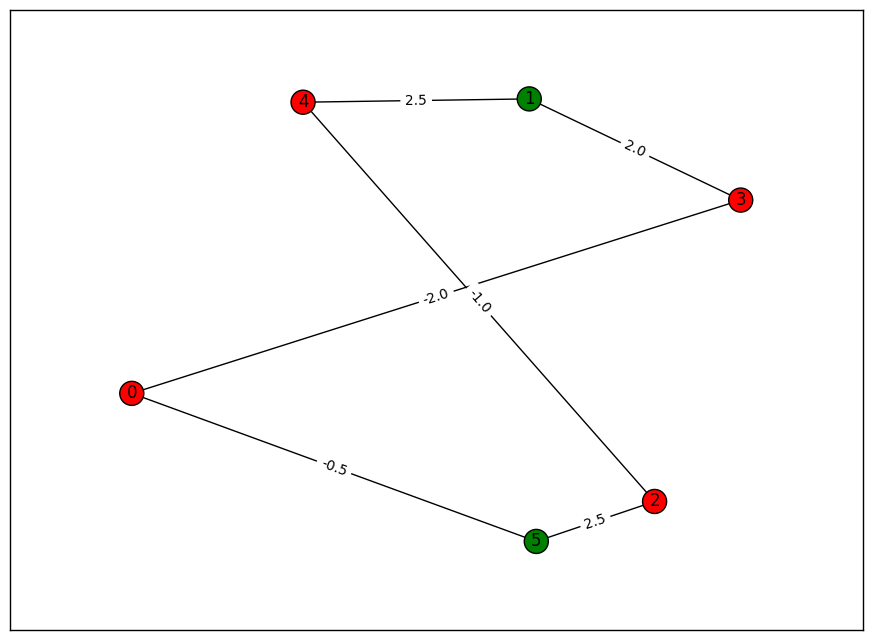

In [9]:
#display the graph
G = nx.from_numpy_matrix(W)
fig=pylab.figure(figsize=(11,8))

colors = ['g', 'r']

node_colors=['w']*W.shape[0]
for node, cluster in enumerate(assignment_X):
    node_colors[node] = colors[int(cluster)]

pos=nx.spring_layout(G)
#edges
nx.draw_networkx(G,pos,
                edgelist=[e for e in G.edges()],
                node_color=node_colors)


labels={e:'{0}'.format(W[e]) for e in G.edges()}
#flow label
nx.draw_networkx_edge_labels(G, pos,
                        edge_labels=labels)

#hide axis
fig.gca().axes.get_xaxis().set_ticks([])
fig.gca().axes.get_yaxis().set_ticks([])

pylab.show()

#### We introduce a gamma perturbation for all edges

In [12]:
gamma = 2
W_gamma1 = gamma * W
L = build_laplacian(W_gamma1)
X = solve_sdp(L, triangle_inequalities=True)
print(X)
X_array=np.array(X)
assignement_X = assignment_solution_sdp(X_array)
print(assignement_X)

{'obj': 51.99999991977254, 'cvxopt_sol': {'dual slack': 6.284338744440707e-11, 'primal slack': 8.937059562719633e-10, 'dual objective': -52.00000035785487, 'gap': 1.0574241956067575e-06, 'z': <900x1 matrix, tc='d'>, 'status': 'optimal', 's': <900x1 matrix, tc='d'>, 'primal objective': -51.99999948169021, 'relative gap': 2.0335080887435174e-08, 'dual infeasibility': 1.4046313347045385e-10, 'y': <6x1 matrix, tc='d'>, 'primal infeasibility': 8.968037596902836e-10, 'iterations': 7, 'residual as primal infeasibility certificate': None, 'x': <21x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None}, 'time': 0.026688098907470703, 'status': 'optimal'}
[ 1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00 -1.00e+00]
[-1.00e+00  1.00e+00 -1.00e+00 -1.00e+00 -1.00e+00  1.00e+00]
[ 1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00 -1.00e+00]
[ 1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00 -1.00e+00]
[ 1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00 -1.00e+00]
[-1.00e+00  1.00e+00 

#### We introduce a gamma perturbation for only one edge

In [13]:
gamma = 10 # if gamma = 1000 it may not work anymore
# random boolean mask for which values will be changed
W_gamma2 = np.array([[0,0,0,-2,0,-0.5*gamma],[0,0,0,2,2.5,0],[0,0,0,0,-1,2.5],[-2,2,0,0,0,0],[0,2.5,-1,0,0,0],[-0.5*gamma,0,2.5,0,0,0]])

In [16]:
L = build_laplacian(W_gamma2)
X = solve_sdp(L, triangle_inequalities=True)
print(X)
X_array=np.array(X)
assignement_X = assignment_solution_sdp(X_array)
print(assignement_X)

{'obj': 23.999999916096087, 'cvxopt_sol': {'dual slack': 1.5124042061070395e-10, 'primal slack': 1.5811769734055775e-09, 'dual objective': -24.00000069124155, 'gap': 1.8553303809509545e-06, 'z': <900x1 matrix, tc='d'>, 'status': 'optimal', 's': <900x1 matrix, tc='d'>, 'primal objective': -23.999999140950628, 'relative gap': 7.73054353066725e-08, 'dual infeasibility': 3.348021845681186e-10, 'y': <6x1 matrix, tc='d'>, 'primal infeasibility': 1.586657774226448e-09, 'iterations': 7, 'residual as primal infeasibility certificate': None, 'x': <21x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None}, 'time': 0.01933598518371582, 'status': 'optimal'}
[ 1.00e+00 -1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00]
[-1.00e+00  1.00e+00  1.00e+00 -1.00e+00 -1.00e+00 -1.00e+00]
[-1.00e+00  1.00e+00  1.00e+00 -1.00e+00 -1.00e+00 -1.00e+00]
[ 1.00e+00 -1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00]
[ 1.00e+00 -1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00]
[ 1.00e+00 -1.00e+00 

## Real data from themoviedb.org
Extracting  a sub graph of the entire database

In [23]:
# building the summary dictionary
summary_dictionary = build_user_to_movies('movielens.tsv')
# unpacking of the dictionary
users_to_movies = summary_dictionary['users_to_movies']
n_users = summary_dictionary['n_users']
k_users = 4
n_movies = summary_dictionary['n_movies']
k_movies = 4
# building the rating matrix
a = build_a(n_users, k_users, n_movies, k_movies, users_to_movies)
# building the adjacency matrix
W = build_graph(k_users, k_movies, a)
print(W)

[[ 0.   0.   0.   0.   0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   2.5]
 [ 0.   0.   0.   0.   2.5  0.5  2.  -0.5]
 [ 0.   0.   0.   0.   2.   0.   1.5  0. ]
 [ 0.   0.   2.5  2.   0.   0.   0.   0. ]
 [ 0.5  0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   2.   1.5  0.   0.   0.   0. ]
 [ 0.   2.5 -0.5  0.   0.   0.   0.   0. ]]


In [24]:
# the laplacian of the graph
L = build_laplacian(W)
X = solve_sdp(L, triangle_inequalities=True)
X_array=np.array(X)
assignment_X = assignment_solution_sdp(X_array)

{'obj': 46.000000000331, 'cvxopt_sol': {'dual slack': 5.564276907655538e-12, 'primal slack': 2.0563825251069704e-11, 'dual objective': -46.00000002245652, 'gap': 5.0450233487840404e-08, 'z': <2112x1 matrix, tc='d'>, 'status': 'optimal', 's': <2112x1 matrix, tc='d'>, 'primal objective': -45.99999997820548, 'relative gap': 1.0967442067770308e-09, 'dual infeasibility': 5.4972568879007575e-12, 'y': <8x1 matrix, tc='d'>, 'primal infeasibility': 2.0603981838709212e-11, 'iterations': 8, 'residual as primal infeasibility certificate': None, 'x': <36x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None}, 'time': 0.07146596908569336, 'status': 'optimal'}


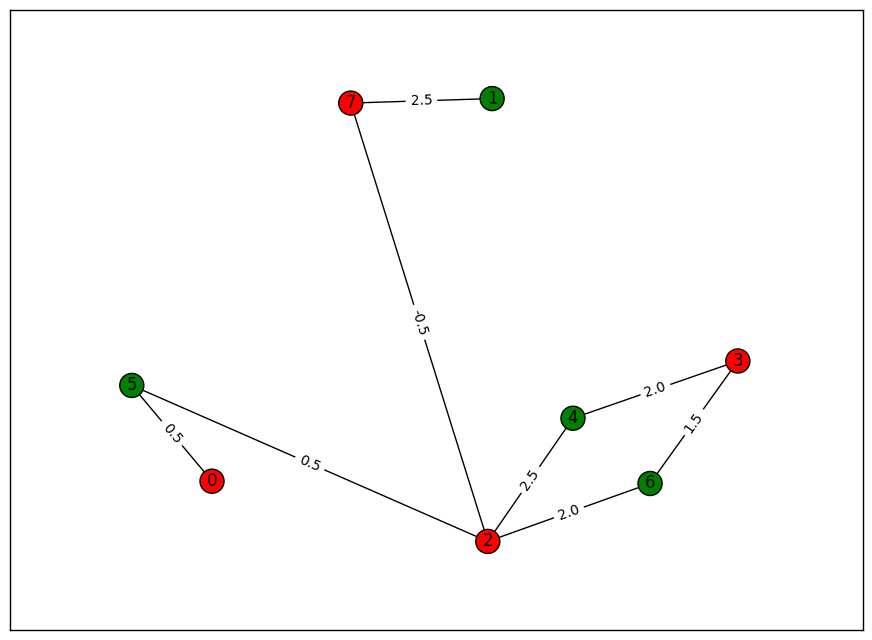

In [25]:
#display the graph
G = nx.from_numpy_matrix(W)
fig=pylab.figure(figsize=(11,8))

colors = ['g', 'r']

node_colors=['w']*W.shape[0]
for node, cluster in enumerate(assignment_X):
    node_colors[node] = colors[int(cluster)]

pos=nx.spring_layout(G)
#edges
nx.draw_networkx(G,pos,
                edgelist=[e for e in G.edges()],
                node_color=node_colors)


labels={e:'{0}'.format(W[e]) for e in G.edges()}
#flow label
nx.draw_networkx_edge_labels(G, pos,
                        edge_labels=labels)

#hide axis
fig.gca().axes.get_xaxis().set_ticks([])
fig.gca().axes.get_yaxis().set_ticks([])

pylab.show()

#### We introduce a gamma perturbation for only part of the edges

In [27]:
gamma = 2 
# random boolean mask for which values will be changed
mask = np.random.randint(0,2,size=W.shape).astype(np.bool)

# random matrix the same shape of the data
r = gamma * W

# use your mask to replace values in your input array
W_gamma2 = W.copy()
W_gamma2[mask] = r[mask]
L = build_laplacian(W_gamma2)
X = solve_sdp(L, triangle_inequalities=True)
print(X)
X_array=np.array(X)
assignement_X = assignment_solution_sdp(X_array)
print(assignement_X)

{'obj': 69.00000000483823, 'cvxopt_sol': {'dual slack': 1.6816646813450347e-11, 'primal slack': 5.098769999051402e-11, 'dual objective': -69.0000000613237, 'gap': 1.2923646165398764e-07, 'z': <2112x1 matrix, tc='d'>, 'status': 'optimal', 's': <2112x1 matrix, tc='d'>, 'primal objective': -68.99999994835274, 'relative gap': 1.8729921992858342e-09, 'dual infeasibility': 9.219878615657107e-12, 'y': <8x1 matrix, tc='d'>, 'primal infeasibility': 5.108727219152404e-11, 'iterations': 8, 'residual as primal infeasibility certificate': None, 'x': <36x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None}, 'time': 0.06381106376647949, 'status': 'optimal'}
[ 1.00e+00 -1.00e+00  1.00e+00  1.00e+00 -1.00e+00 -1.00e+00 -1.00e+00 ... ]
[-1.00e+00  1.00e+00 -1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00 ... ]
[ 1.00e+00 -1.00e+00  1.00e+00  1.00e+00 -1.00e+00 -1.00e+00 -1.00e+00 ... ]
[ 1.00e+00 -1.00e+00  1.00e+00  1.00e+00 -1.00e+00 -1.00e+00 -1.00e+00 ... ]
[-1.00e+00  1.00e+00 -1